With Homotopy continuation, try some higher dimension global optimization problems. 

In [1]:
include("optim_lib.jl")
include("lib_func.jl")

# Constants and Parameters
const d1, d2, ds = 2, 16, 1  # Degree range and step
const n, a, b = 3, 5, 1
const C = a / b  # Scaling constant, C is appears in `main_computation`, maybe it should be a parameter.
const delta, alph = .9 , 2 / 10  # Sampling parameters
f = alpine1 # Function to optimize

#21 (generic function with 1 method)

In [2]:
results = main_gen(f, n, d1, d2, ds, delta, alph, C, 0.5)


dimension Vector space: 10

sample size: 216

dimension Vector space: 20

sample size: 512

dimension Vector space: 35

sample size: 1331

dimension Vector space: 56

sample size: 2197

dimension Vector space: 84

sample size: 4096

dimension Vector space: 120

sample size: 6859

dimension Vector space: 165

sample size: 12167

dimension Vector space: 220

sample size: 17576

dimension Vector space: 286

sample size: 27000

dimension Vector space: 364

sample size: 39304

dimension Vector space: 455

sample size: 59319

dimension Vector space: 560

sample size: 79507

dimension Vector space: 680

sample size: 110592

dimension Vector space: 816

sample size: 148877

dimension Vector space: 969

sample size: 195112


15-element Vector{Any}:
 [8.616927767855286, -0.2440169358562862, 0.5103170801000262, -0.24401693585628614, 1.4145300188151706e-16, 0.5103170801000261, -0.24401693585628376, -8.287447411348189e-17, 6.069252304841002e-16, 0.5103170801000261]
 [12.464881425631651, -0.27059805007309895, 1.5747154393833767, -0.27059805007309745, -0.2705980500730999, 1.2349890845097822e-16, -7.080330854577026e-16, 1.5747154393833764, 1.3661662665404946e-16, -0.2705980500730982, -0.27059805007315174, -2.8836939039040997e-15, 2.9206098510667766e-15, -6.984156795200715e-16, 7.047177289517123e-17, 2.498380455873516e-15, 1.5747154393833784, -9.098516825026729e-17, -3.466824485260088e-16, -0.27059805007310267]
 [10.761050222323915, 0.07488074159541055, 1.7450616990634866, -0.26562573072672807, -2.14710071858461, 0.07488074159540846, -3.3905053140082716e-16, -4.604472038780143e-17, -1.5248424904839772e-16, 1.745061699063489  …  1.745061699063478, -3.6339934039158254e-16, 1.7497608756151789e-15, 1.0099805172721245e

In [3]:
using DynamicPolynomials, MultivariatePolynomials, HomotopyContinuation, JSON, PlotlyJS, CSV
include("hom_solve.jl")

RRsolve (generic function with 1 method)

Here we use Homotopy continuation to solve the system.
What could we hope to find ? The global minimum should be in the list.

Take the critical point with smallest evaluation of $f$ in the list, do the xy, xz, yz contour plots around that point. 

In [4]:
# Define your main function
@polyvar(x[1:n]) # Define polynomial ring 
function main()
    # @polyvar x[1:n] # Define polynomial ring

    h_x = Float64[]
    h_y = Float64[]
    h_z = Float64[]

    col = Int[]  # Initialize the color vector

    for (i, d) in enumerate(d1:ds:d2)
        local lambda = support_gen(n, d)[1] # Take support  
        local R = generateApproximant(lambda, results[i], :BigFloat) # Compute the approximant

        # Generate the system for HomotopyContinuation
        local P1 = differentiate(R, x[1])
        local P2 = differentiate(R, x[2])
        local P3 = differentiate(R, x[3])

        local S = RRsolve(n, [P1, P2, P3]) # HomotopyContinuation

        # Define the condition for filtering
        condition(point) = -1 < point[1] < 1 && -1 < point[2] < 1 && -1 < point[3] < 1

        # Filter points using the filter function
        filtered_points = filter(condition, S)
        println("Degree: ", d)
        println("Number of solutions: ", length(filtered_points))

        append!(h_x, [point[1] for point in filtered_points]) # For plotting
        append!(h_y, [point[2] for point in filtered_points])
        append!(h_z, [point[3] for point in filtered_points])
        append!(col, fill(i, length(filtered_points)))
    end
    return h_x, h_y, h_z, col
end

h_x, h_y, h_z, col = main()

Degree: 2
Number of solutions: 1
Tracking 8 paths...  25%|███████▊                       |  ETA: 0:00:10



Tracking 8 paths... 100%|███████████████████████████████| Time: 0:00:04
  # paths tracked:                  8
  # non-singular solutions (real):  8 (8)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         8 (8)
Degree: 3
Number of solutions: 1
Tracking 27 paths...   7%|██▎                           |  ETA: 0:00:45



Tracking 27 paths... 100%|██████████████████████████████| Time: 0:00:03
  # paths tracked:                  27
  # non-singular solutions (real):  27 (27)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         27 (27)
Degree: 4
Number of solutions: 27
Tracking 64 paths...   3%|█                             |  ETA: 0:01:56



Tracking 64 paths... 100%|██████████████████████████████| Time: 0:00:03
  # paths tracked:                  64
  # non-singular solutions (real):  64 (64)
  # singular endpoints (real):      0 (0)
 

Excessive output truncated after 524324 bytes.





Tracking 3375 paths...  50%|██████████████              |  ETA: 0:03:25


([0.1195418228057627, -0.08241790174869443, 0.7634117728382115, -0.021071961082593984, 0.7634117728382114, -0.7887324416682872, -0.788732441668287, -0.021071961082594046, 0.7634117728382115, 0.7634117728382114  …  -0.48560115153753675, 0.6117201968516576, -0.027556397232431057, 0.482299098408402, -0.9974281147211532, -0.48560115153753663, 0.482299098408402, -0.18340671875619197, 0.9487899851795298, -0.6475750577181613], [0.11954182280576266, -0.08241790174869475, 0.7634117728382113, -0.7887324416682875, -0.02107196108259409, 0.7634117728382115, -0.7887324416682875, -0.02107196108259409, -0.021071961082594026, 0.7634117728382115  …  0.48229909840840096, -0.8113643584272437, -0.997428114721159, -0.8113643584272437, -0.027556397232438246, 0.9487899851795271, -0.9974281147211542, -0.6475750577181605, -0.6475750577181605, 0.00687877474520809], [0.11954182280576152, -0.08241790174868806, 0.7634117728382117, 0.7634117728382115, -0.7887324416682865, -0.7887324416682867, 0.7634117728382115, -0.

In [5]:
using DataFrames
df = DataFrame(x=C * h_x, y=C * h_y, z=C * h_z, col=col)
df[!, :result] = [f([df.x[i], df.y[i], df.z[i]]) for i in 1:nrow(df)]
min_val = minimum(df.result)
min_index = findfirst(df.result .== min_val)
println("Minimum value: ", min_val)
println("smallest critical point:", [df.x[min_index], df.y[min_index], df.z[min_index]])

In [30]:
associated_x = []
associated_y = []
associated_z = []
# Loop through each unique value in the 'col' column
for i in unique(df.col)
    println("Col: ", i)
    # Filter DataFrame for rows where 'col' equals i
    df_filtered = df[df.col.==i, :]

    # Find the smallest value in the 'col' column of the filtered DataFrame
    min_value = minimum(df_filtered.result)

    # Find the row index of the smallest value in the filtered DataFrame
    min_index = findfirst(df_filtered.result .== min_value)

    # Grab the associated x, y, z values
    append!(associated_x, df_filtered.x[min_index])
    append!(associated_y, df_filtered.y[min_index])
    append!(associated_z, df_filtered.z[min_index])

    # Print the results
    println("Smallest critical point for col = $i: [", associated_x, ", ", associated_y, ", ", associated_z, "]")
    println("Minimum value for col = $i: ", min_value)
end

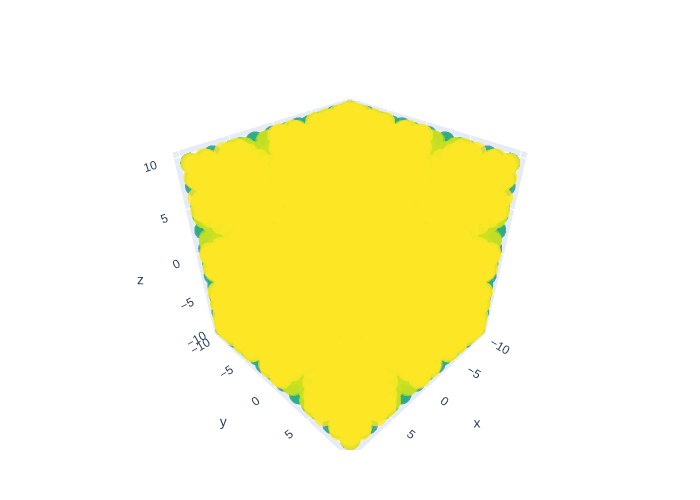

In [7]:
using PlotlyJS, CSV
plot(
    df,
    x=:x, y=:y, z=:z, 
    marker=attr(
        size=12,
        color=df.col,                # set color to an array/list of desired values
        colorscale="Viridis",   # choose a colorscale
        opacity=0.8
    ),
    type="scatter3d", mode="markers"
)

In [8]:

# Create a grid of points for contour plot
x_range = range(minimum(df.x), stop=maximum(df.x), length=100)
y_range = range(minimum(df.y), stop=maximum(df.y), length=100)
z_range = range(minimum(df.z), stop=maximum(df.z), length=100)




Now we generate the contour plots of f around the smallest critical point. 

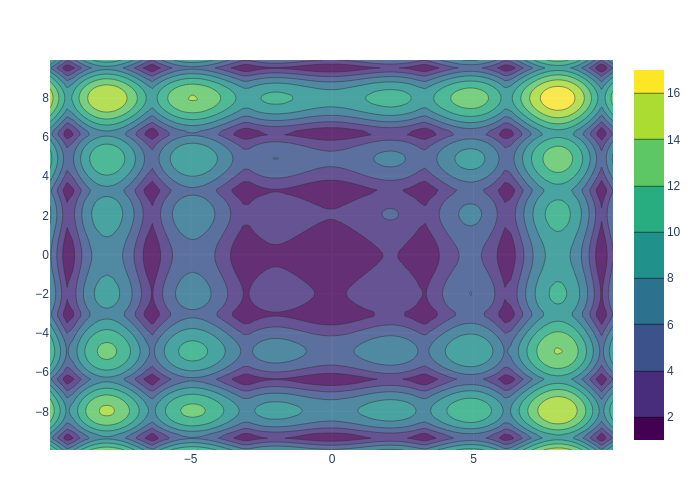

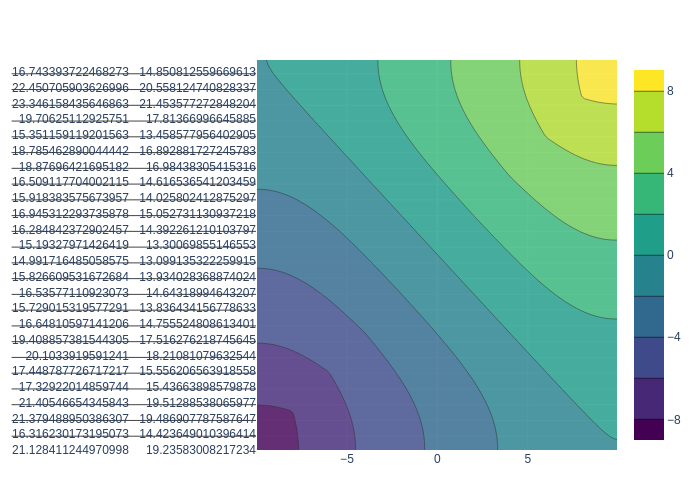

In [10]:
# Define the contour plot
contour_trace_y = contour(
    x=x_range,
    y=y_values,
    z=z_range,
    colorscale="Viridis",
    opacity=0.8
)

# Plot the 2D contour plot
plot(contour_trace_y)

In [ ]:
# Define the contour plot
contour_trace_x = contour(
    x=x_values,
    y=y_range,
    z=z_range,
    colorscale="Viridis",
    opacity=0.8
)

# Plot the 2D contour plot
plot(contour_trace_x)